<a href="https://colab.research.google.com/github/bhavikakaura/Dataa-for-Risk-Analysis-of-5G-Network-Security/blob/main/Poisson_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install required packages
!pip install matplotlib pandas scipy

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

# Upload the CSV
from google.colab import files
uploaded = files.upload()

# Load the CSV and show structure
df = pd.read_csv(next(iter(uploaded)))
print("First few rows:")
print(df.head())

print("\nColumn names:")
print(df.columns)


Saving realistic_5G_security_dataset (1).csv to realistic_5G_security_dataset (1) (1).csv
First few rows:
  Incident_ID          CVE_ID           Threat_Type  CVSS_Score  \
0   INC-00001  CVE-2024-16795                  DDoS         6.7   
1   INC-00002  CVE-2022-77820                  DDoS         5.0   
2   INC-00003   CVE-2024-7265   Unauthorized Access         8.8   
3   INC-00004  CVE-2020-38194  Network Slice Breach         6.5   
4   INC-00005  CVE-2020-45131                  DDoS        10.0   

   Incident_Frequency_Yearly  Economic_Impact_kCAD  Downtime_Hours  \
0                          6                   100               8   
1                          3                  1000              24   
2                          5                   250               2   
3                          6                   500               4   
4                          3                  1000               2   

   Affected_Users_k                 Affected_Component  
0            

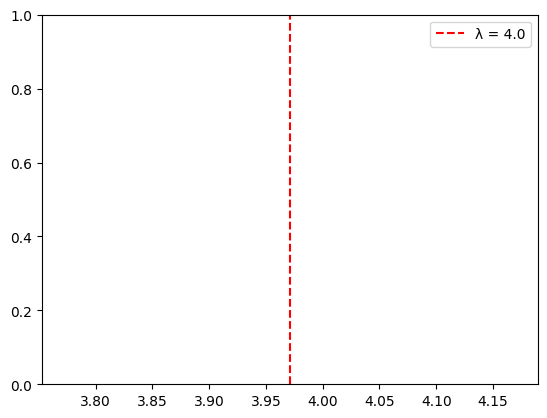

In [7]:
plt.axvline(lambda_estimate, color='red', linestyle='--', label=f'λ = {lambda_estimate:.1f}')
plt.legend()


In [8]:
pip install dash pandas plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 67.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 17.2 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


In [11]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.graph_objs as go
from scipy.stats import poisson
import numpy as np

# Load the dataset
df = pd.read_csv('realistic_5G_security_dataset (1).csv')

# Initialize Dash app
app = dash.Dash(__name__)
server = app.server

# App layout
app.layout = html.Div([
    html.H1("5G Security Incident Dashboard", style={'textAlign': 'center'}),

    html.Div([
        html.Label("Adjust λ (Average Incidents per Year):"),
        dcc.Slider(
            id='lambda-slider',
            min=1,
            max=50,
            step=1,
            value=int(df['Incident_Frequency_Yearly'].mean()),
            marks={i: str(i) for i in range(0, 51, 5)}
        ),
    ], style={'padding': '20px'}),

    dcc.Graph(id='poisson-plot'),

    html.Div([
        html.Label("Select Threat Type:"),
        dcc.Dropdown(
            id='threat-dropdown',
            options=[{'label': t, 'value': t} for t in df['Threat_Type'].unique()],
            value=df['Threat_Type'].unique()[0]
        ),
    ], style={'padding': '20px'}),

    dcc.Graph(id='impact-bar-chart'),
    dcc.Graph(id='downtime-bar-chart')
])

# Callbacks
@app.callback(
    Output('poisson-plot', 'figure'),
    Input('lambda-slider', 'value')
)
def update_poisson(lambda_val):
    k_range = np.arange(0, int(lambda_val * 2))
    probs = poisson.pmf(k_range, mu=lambda_val)

    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=k_range,
        y=probs,
        marker=dict(color='skyblue'),
        name='Poisson Probability'
    ))

    fig.update_layout(
        title=f'Poisson Distribution (λ = {lambda_val})',
        xaxis_title='Number of Incidents per Year',
        yaxis_title='Probability',
        template='plotly_white'
    )
    return fig

@app.callback(
    [Output('impact-bar-chart', 'figure'),
     Output('downtime-bar-chart', 'figure')],
    Input('threat-dropdown', 'value')
)
def update_bar_charts(threat_type):
    filtered_df = df[df['Threat_Type'] == threat_type]

    impact_fig = go.Figure(go.Bar(
        x=filtered_df['Affected_Component'],
        y=filtered_df['Economic_Impact_kCAD'],
        marker_color='orange'
    ))
    impact_fig.update_layout(
        title=f'Economic Impact by Component - {threat_type}',
        xaxis_title='Component',
        yaxis_title='Impact (kCAD)',
        template='plotly_white'
    )

    downtime_fig = go.Figure(go.Bar(
        x=filtered_df['Affected_Component'],
        y=filtered_df['Downtime_Hours'],
        marker_color='green'
    ))
    downtime_fig.update_layout(
        title=f'Downtime by Component - {threat_type}',
        xaxis_title='Component',
        yaxis_title='Downtime (Hours)',
        template='plotly_white'
    )

    return impact_fig, downtime_fig

# Run app
if __name__ == '__main__':
    app.run(debug=True)



<IPython.core.display.Javascript object>

In [10]:
app.run(debug=True)


<IPython.core.display.Javascript object>